# Activation Functions and Their Derivatives

| Function Name     | Activation Function $f(x)$                                                                     | Derivative $f'(x)$                                                                                |
| ----------------- | ---------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------- |
| **Step**          | $f(x) = \begin{cases} 1 & x \geq 0 \\ 0 & x < 0 \end{cases}$                                   | $f'(x) = 0 \quad \text{(undefined at } x=0\text{)}$                                               |
| **Linear**        | $f(x) = x$                                                                                     | $f'(x) = 1$                                                                                       |
| **Sigmoid**       | $f(x) = \frac{1}{1 + e^{-x}}$                                                                  | $f'(x) = f(x)(1 - f(x))$                                                                          |
| **Tanh**          | $f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$                                          | $f'(x) = 1 - \tanh^2(x)$                                                                          |
| **ReLU**          | $f(x) = \max(0, x)$                                                                            | $f'(x) = \begin{cases} 1 & x > 0 \\ 0 & x < 0 \\ \text{undefined at } x=0 \end{cases}$            |
| **Leaky ReLU**    | $f(x) = \begin{cases} x & x > 0 \\ \alpha x & x \leq 0 \end{cases}$                            | $f'(x) = \begin{cases} 1 & x > 0 \\ \alpha & x \leq 0 \end{cases}$                                |
| **ELU**           | $f(x) = \begin{cases} x & x \geq 0 \\ \alpha (e^x - 1) & x < 0 \end{cases}$                    | $f'(x) = \begin{cases} 1 & x \geq 0 \\ \alpha e^x & x < 0 \end{cases}$                            |
| **SELU**          | $f(x) = \lambda \begin{cases} x & x \geq 0 \\ \alpha (e^x - 1) & x < 0 \end{cases}$            | $f'(x) = \lambda \begin{cases} 1 & x \geq 0 \\ \alpha e^x & x < 0 \end{cases}$                    |
| **GELU (approx)** | $f(x) \approx 0.5x \left(1 + \tanh\left[\sqrt{\frac{2}{\pi}} (x + 0.044715x^3)\right] \right)$ | Complex (see below)                                                                               |
| **Swish**         | $f(x) = \frac{x}{1 + e^{-x}}$                                                                  | $f'(x) = \sigma(x) + x \cdot \sigma(x) (1 - \sigma(x))$, where $\sigma(x) = \frac{1}{1 + e^{-x}}$ |

### Approximate GELU Derivative

For reference, the derivative of the approximate **GELU** is:

$$
f'(x) \approx 0.5 \left(1 + \tanh\left( \sqrt{\frac{2}{\pi}}(x + 0.044715x^3) \right) \right) + \\
0.5x(1 - \tanh^2(...)) \cdot \left( \sqrt{\frac{2}{\pi}} (1 + 3 \cdot 0.044715x^2) \right)
$$

Where `...` is the same tanh input term above.

## Requaired Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Plot
Now we are going to plot different activation functions with there derivatives.

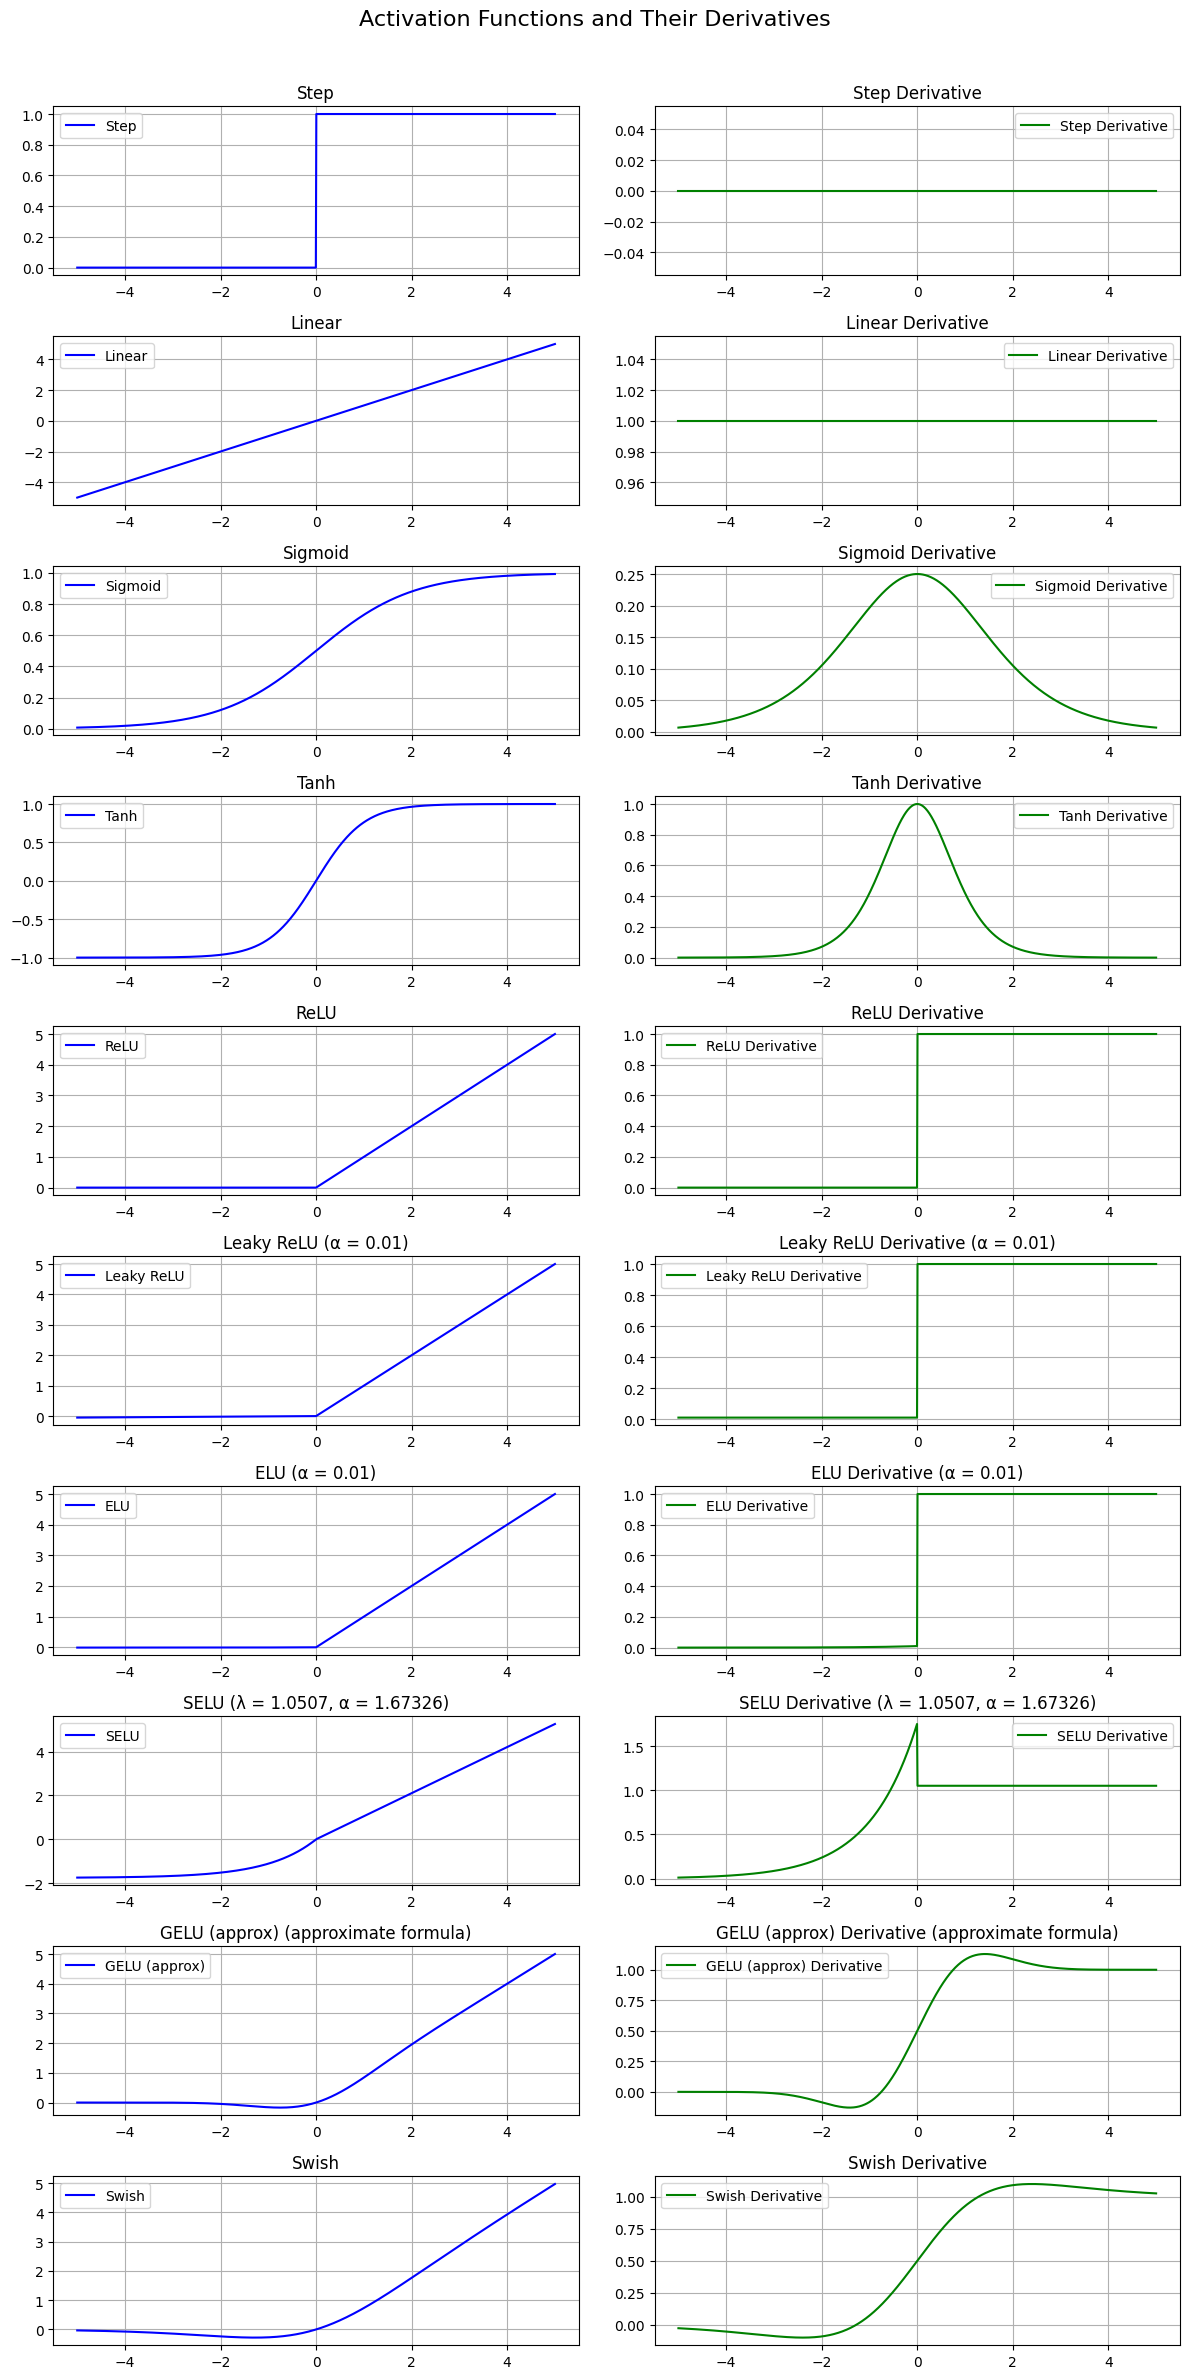

In [4]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, 1000)
# Parameters
alpha = 0.01
selu_lambda = 1.0507
selu_alpha = 1.67326

# Activation Functions and Derivatives
def step(x): 
    return np.where(x >= 0, 1, 0)
def d_step(x): 
    return np.zeros_like(x)

def linear(x): 
    return x
def d_linear(x): 
    return np.ones_like(x)

def sigmoid(x): 
    return 1 / (1 + np.exp(-x))
def d_sigmoid(x): 
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x): 
    return np.tanh(x)
def d_tanh(x): 
    return 1 - np.tanh(x) ** 2

def relu(x): 
    return np.maximum(0, x)
def d_relu(x): 
    return np.where(x > 0, 1, 0)

def leaky_relu(x): 
    return np.where(x > 0, x, alpha * x)
def d_leaky_relu(x): 
    return np.where(x > 0, 1, alpha)

def elu(x): 
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))
def d_elu(x): 
    return np.where(x >= 0, 1, alpha * np.exp(x))

def selu(x): 
    return selu_lambda * np.where(x >= 0, x, selu_alpha * (np.exp(x) - 1))
def d_selu(x): 
    return selu_lambda * np.where(x >= 0, 1, selu_alpha * np.exp(x))

def gelu(x): 
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))
def d_gelu(x):
    tanh_term = np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3))
    left = 0.5 * (1 + tanh_term)
    sech2 = 1 - tanh_term**2
    right = 0.5 * x * sech2 * (np.sqrt(2 / np.pi) * (1 + 3 * 0.044715 * x**2))
    return left + right

def swish(x):
    return x / (1 + np.exp(-x))
def d_swish(x):
    sig = sigmoid(x)
    return sig + x * sig * (1 - sig)

# Activation List with Parameters for Title 
activation_functions = [
    ("Step", step, d_step, ""),
    ("Linear", linear, d_linear, ""),
    ("Sigmoid", sigmoid, d_sigmoid, ""),
    ("Tanh", tanh, d_tanh, ""),
    ("ReLU", relu, d_relu, ""),
    ("Leaky ReLU", leaky_relu, d_leaky_relu, f"(α = {alpha})"),
    ("ELU", elu, d_elu, f"(α = {alpha})"),
    ("SELU", selu, d_selu, f"(λ = {selu_lambda}, α = {selu_alpha})"),
    ("GELU (approx)", gelu, d_gelu, "(approximate formula)"),
    ("Swish", swish, d_swish, ""),
]

# Plotting
fig, axs = plt.subplots(len(activation_functions), 2, figsize=(12, len(activation_functions) * 2.5))
fig.suptitle("Activation Functions and Their Derivatives", fontsize=16)

for i, (name, func, deriv, param_str) in enumerate(activation_functions):
    # Plot function
    axs[i, 0].plot(x, func(x), color='blue', label=f"{name}")
    axs[i, 0].set_title(f"{name} {param_str}".strip())
    axs[i, 0].grid(True)
    axs[i, 0].legend()

    # Plot derivative
    axs[i, 1].plot(x, deriv(x), color='green', label=f"{name} Derivative")
    axs[i, 1].set_title(f"{name} Derivative {param_str}".strip())
    axs[i, 1].grid(True)
    axs[i, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()
